# Biodiversity in National Parks

In [1]:
# Load the necessary libraries:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load the dataframes:

species = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")

In [3]:
# What we want to find out:

#What is the distribution of conservation status for animals?
#Are certain types of species more likely to be endangered?
#Are the differences between species and their conservation status significant?
#Which species were spotted the most at each park?

# Questions for further research:

# Is there a statistical way we can determine how much cuteness/societal popularity impacts the rates of protection 
# for different categories/species?

# Distribution of Conservations Status:

Text(0.5, 1.0, 'Distribution of Conservation Status')

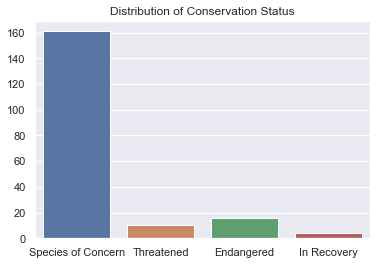

In [4]:
conservation = species["conservation_status"]

#SOC = 161
#ENDG = 16
#THRT = 10
#INRC = 4
#NaN = 5633

SOC = species[species["conservation_status"] == "Species of Concern"]
ENDG = species[species["conservation_status"] == "Endangered"]
THRT = species[species["conservation_status"] == "Threatened"]
INRC = species[species["conservation_status"] == "In Recovery"]

x = ["Species of Concern", "Threatened", "Endangered", "In Recovery"]
y = [161, 10, 16, 4]

sns.set_theme(style="darkgrid")
sns.barplot(x=x, y=y, data=species)
plt.title("Distribution of Conservation Status")

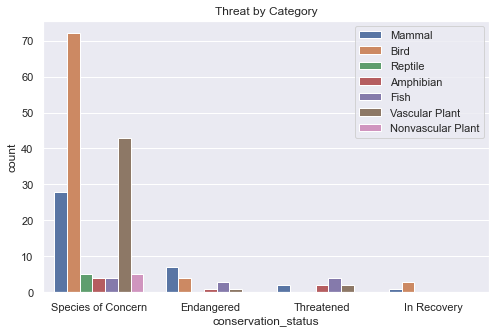

In [5]:
plt.figure(figsize=[8, 5])
sns.countplot(data=species, x="conservation_status", hue='category')
plt.legend(loc='upper right')
plt.title("Threat by Category")
plt.show()

In [6]:
# The above graph shows that birds are the most likely species to be of concern, and mammals are the most likely to be
# listed as endangered. We'll also make a new dataframe of percentages and perfom a statistical significance test 
# to determine if different species have statistically significant differences in conservation status rates. 

# Statistical Significance in Rates of Protection

In [21]:
species.fillna('No Intervention', inplace=True)
species['is_protected'] = species.conservation_status != 'No Intervention'

category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                              index='category',
                              values='scientific_name')\
                        .reset_index()

category_counts.columns = ['category', 'not_protected', 'protected']

print(category_counts)

            category  not_protected  protected
0          Amphibian             72          7
1               Bird            413         75
2               Fish            115         11
3             Mammal            146         30
4  Nonvascular Plant            328          5
5            Reptile             73          5
6     Vascular Plant           4216         46


In [ ]:
# Add a percentage column to compare percentages protected of each category:

In [18]:
category_counts['percentage'] = (category_counts.protected / (category_counts.protected + category_counts.not_protected) *100)

print(category_counts)

            category  not_protected  protected  percentage
0          Amphibian             72          7    8.860759
1               Bird            413         75   15.368852
2               Fish            115         11    8.730159
3             Mammal            146         30   17.045455
4  Nonvascular Plant            328          5    1.501502
5            Reptile             73          5    6.410256
6     Vascular Plant           4216         46    1.079305


In [ ]:
# Let's run contingency tests on differences between mammals and birds and mammals and reptiles to see if there is
# statistical significance between their rates of protection.

In [19]:
from scipy.stats import chi2_contingency

mammals_v_birds = [[30, 146], [75, 413]]
chi2_contingency(mammals_v_birds)

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

In [ ]:
# In this contingency test, the p_value is 0.69, which is larger than 0.05, leading us to accept a null hypothesis that says
# that there is NOT statistically significant difference between the two groups.

# Next is a contingency test between mammals and reptiles:

In [20]:
mammals_v_reptiles = [[30, 146], [5, 73]]
chi2_contingency(mammals_v_reptiles)

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

In [ ]:
# This p-value of 0.39 is much smaller, leading us to reject the null hypothesis and conclude that there IS statistically
# significant difference between the rates of protection for mammals and reptiles.

# Species Observations in National Parks

In [ ]:
# First, let's clean up the data from our "observations" dataset, which is separated by commas but not spaces:

In [23]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [28]:
# Let's now find all the "common_names" for mammals from our "species" dataframe, so we can look at how they are 
# represented in the "observations" dataframe, to be counted later:

In [29]:
common_names = species[species.category == 'Mammal']\
                        .common_names\
                        .apply(remove_punctuations)\
                        .str.split().tolist()

print(common_names[:5])

[['Gappers', 'RedBacked', 'Vole'], ['American', 'Bison', 'Bison'], ['Aurochs', 'Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated', 'Cattle'], ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'], ['Wapiti', 'Or', 'Elk']]


In [ ]:
# Now we clean up "common_names" by getting rid of any duplicate names using dict.fromkeys:

In [31]:
cleanRows = []

for item in common_names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
print(cleanRows[:5])

[['Gappers', 'RedBacked', 'Vole'], ['American', 'Bison'], ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'], ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'], ['Wapiti', 'Or', 'Elk']]


In [ ]:
# All of these common names are still separated into many individual lists inside one big list - let's collapse them into
# one single list:

In [32]:
mammals = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))

print(mammals[:5])

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison']


In [ ]:
# Now we can use this list to count the number of occurrances of each word:

In [34]:
words_counted = []

for i in mammals:
    x = mammals.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending=False)

,Word,Count
106,Bat,23
16,Shrew,18
32,Myotis,17
122,Mouse,16
55,Chipmunk,13
...,...,...
93,Desert,1
92,Hog,1
25,Lodgepole,1
90,Wolverine,1


In [ ]:
# From this new dataframe, we can see that the commonly occurring word in the mammals section of the species dataframe is
# BATS. Next, we will figure out which rows of the "species" dataframe are specifically referring to bats and separate them,
# making a new column to denote if something is a bat or not:

In [39]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)

In [40]:
print(species[species.is_bat].head())

   category            scientific_name                common_names  \
28   Mammal   Corynorhinus rafinesquii  Rafinesque's Big-Eared Bat   
29   Mammal           Eptesicus fuscus               Big Brown Bat   
30   Mammal  Lasionycteris noctivagans           Silver-Haired Bat   
31   Mammal          Lasiurus borealis    Eastern Red Bat, Red Bat   
32   Mammal          Lasiurus cinereus                   Hoary Bat   

   conservation_status  is_protected  is_bat  
28     No Intervention         False    True  
29  Species of Concern          True    True  
30  Species of Concern          True    True  
31     No Intervention         False    True  
32     No Intervention         False    True  


In [ ]:
# Now we can merge these bat species with bat observations in a new dataframe using "merge":

In [41]:
bat_observations = observations.merge(species[species.is_bat])

print(bat_observations.head())

            scientific_name                            park_name  \
0     Lasiurus blossevillii                  Bryce National Park   
1     Lasiurus blossevillii  Great Smoky Mountains National Park   
2     Lasiurus blossevillii               Yosemite National Park   
3     Lasiurus blossevillii            Yellowstone National Park   
4  Corynorhinus rafinesquii               Yosemite National Park   

   observations category                common_names conservation_status  \
0           113   Mammal             Western Red Bat  Species of Concern   
1            70   Mammal             Western Red Bat  Species of Concern   
2           123   Mammal             Western Red Bat  Species of Concern   
3           221   Mammal             Western Red Bat  Species of Concern   
4           188   Mammal  Rafinesque's Big-Eared Bat     No Intervention   

   is_protected  is_bat  
0          True    True  
1          True    True  
2          True    True  
3          True    True  
4   

In [ ]:
# Now, we can see how many bat observations were made at each national park using "groupby":

In [43]:
bat_observations.groupby('park_name').observations.sum().reset_index().sort_values("observations", ascending=False)

,park_name,observations
2,Yellowstone National Park,8362
3,Yosemite National Park,4786
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411


In [ ]:
# We can use groupby again to see if these observations are of protected bats or not, and graph it using "barplot":

In [45]:
obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
print(obs_by_park)

                             park_name  is_protected  observations
0                  Bryce National Park         False          1596
1                  Bryce National Park          True          1837
2  Great Smoky Mountains National Park         False          1299
3  Great Smoky Mountains National Park          True          1112
4            Yellowstone National Park         False          4044
5            Yellowstone National Park          True          4318
6               Yosemite National Park         False          2345
7               Yosemite National Park          True          2441


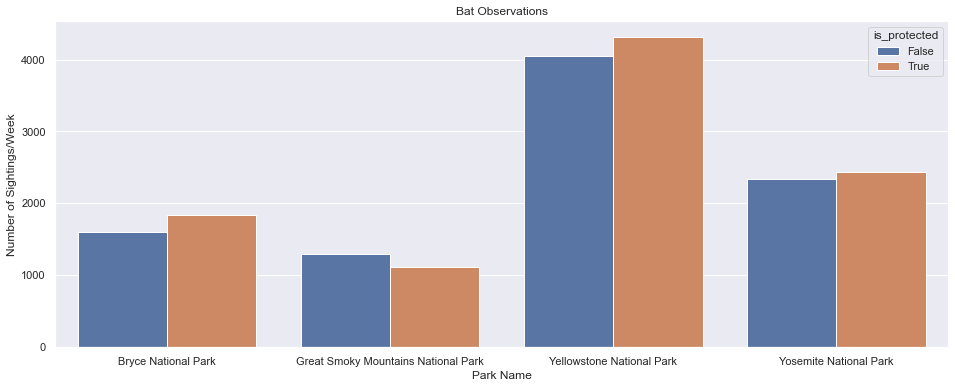

In [46]:
plt.figure(figsize=(16, 6))
sns.barplot(x=obs_by_park.park_name, y=obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel("Park Name")
plt.ylabel("Number of Sightings/Week")
plt.title("Bat Observations")
plt.show()

# Conclusions